**Importing Libraries and dependencies**

In [ ]:
!pip install nlu
import os
! apt-get update -qq > /dev/null   
# Install java
# ! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]

     |████████████████████████████████| 153kB 10.7MB/s 
     |████████████████████████████████| 217.9MB 68kB/s 
     |████████████████████████████████| 133kB 50.1MB/s 
     |████████████████████████████████| 17.7MB 202kB/s 
     |████████████████████████████████| 204kB 60.3MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.7-py2.py3-none-any.whl size=218279466 sha256=78eecc23525460f20035f874cdcb05abd1e9171c78e76258390bb6a44060a8f3
  Stored in directory: /root/.cache/pip/wheels/34/1f/2e/1e7460f80acf26b08dbb8c53d7ff9e07146f2a68dd5c732be5
Successfully built pyspark
  Found existing installation: pyarrow 0.14.1
    Uninstalling pyarrow-0.14.1:
      Successfully uninstalled pyarrow-0.14.1


In [ ]:
import nlu
nlu.load('bert').predict("He was suprised by the diversity of NLU")

small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]


,bert_embeddings,token
origin_index,,
0,"[-2.0262551307678223, 1.006833791732788, -0.04...",He
0,"[-0.8035559058189392, 1.0372512340545654, -0.3...",was
0,"[-0.46171367168426514, 0.09951147437095642, -0...",suprised
0,"[-1.0386810302734375, 1.5081380605697632, 0.28...",by
0,"[-1.0494319200515747, 1.456487774848938, -0.26...",the
0,"[-1.1288515329360962, 0.06162405386567116, -0....",diversity
0,"[-0.7127432227134705, 0.630967378616333, -0.39...",of
0,"[-1.0217595100402832, 0.39564353227615356, -0....",NLU


**Importing Dataset**

In [ ]:
import pandas as pd
# Download the dataset
! wget -N https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv -P /tmp
# Load dataset to Pandas
df = pd.read_csv('/tmp/train-balanced-sarcasm.csv')
df

--2020-11-04 09:27:02--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.104.165
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.104.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255268960 (243M) [text/csv]
Saving to: ‘/tmp/train-balanced-sarcasm.csv’

train-balanced-sarc 100%[===================>] 243.44M  40.6MB/s    in 5.5s    

2020-11-04 09:27:07 (44.4 MB/s) - ‘/tmp/train-balanced-sarcasm.csv’ saved [255268960/255268960]



,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...


In [ ]:
pipe = nlu.load('pos sentiment emotion bert')

# We must set output level to token since NLU will infer a different output level for this pipeline composition
predictions = pipe.predict(df[['comment','label']].iloc[0:1000], output_level='token')
predictions

pos_anc download started this may take some time.
Approximate size to download 4.3 MB
[OK!]
analyze_sentiment download started this may take some time.
Approx size to download 4.9 MB
[OK!]
classifierdl_use_emotion download started this may take some time.
Approximate size to download 20.7 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]


,checked,sentiment,bert_embeddings,document_assembler@sentiment,token,text,emotion_confidence,sentence_detector@sentiment,sentence_embeddings,emotion,pos,sentiment_confidence,label
origin_index,,,,,,,,,,,,,
0,NC,negative,"[-1.3535488843917847, 1.2997395992279053, -0.6...",[NC and NH.],NC,NC and NH.,0.972704,[NC and NH.],"[[-0.06570463627576828, -0.03522053360939026, ...",surprise,NNP,0.522900,0
0,and,negative,"[-1.1345281600952148, 0.8951002955436707, -0.9...",[NC and NH.],and,NC and NH.,0.972704,[NC and NH.],"[[-0.06570463627576828, -0.03522053360939026, ...",surprise,CC,0.522900,0
0,NH,negative,"[-1.658284068107605, 0.7519569993019104, -1.14...",[NC and NH.],NH,NC and NH.,0.972704,[NC and NH.],"[[-0.06570463627576828, -0.03522053360939026, ...",surprise,NNP,0.522900,0
0,.,negative,None,[NC and NH.],.,NC and NH.,0.972704,[NC and NH.],"[[-0.06570463627576828, -0.03522053360939026, ...",surprise,.,0.522900,0
1,You,negative,"[-0.8970238566398621, 0.9131066203117371, -0.4...",[You do know west teams play against west team...,You,You do know west teams play against west teams...,0.999838,[You do know west teams play against west team...,"[[-0.0254225991666317, 0.05448468029499054, -0...",fear,PRP,0.473300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,crowd,negative,"[-1.942466378211975, -0.10625925660133362, -0....","[yeah, god forbid jesse look out for his fans ...",crowd,"yeah, god forbid jesse look out for his fans b...",0.953047,"[yeah, god forbid jesse look out for his fans ...","[[0.049849480390548706, -0.054164644330739975,...",sadness,NN,0.478800,1
998,.,negative,None,"[yeah, god forbid jesse look out for his fans ...",.,"yeah, god forbid jesse look out for his fans b...",0.953047,"[yeah, god forbid jesse look out for his fans ...","[[0.049849480390548706, -0.054164644330739975,...",sadness,.,0.478800,1
999,Beer,na,"[-2.0645058155059814, 0.16339515149593353, -0....",[Beer city USA],Beer,Beer city USA,0.883565,[Beer city USA],"[[-0.050827838480472565, -0.045025844126939774...",joy,NNP,0.000000,0


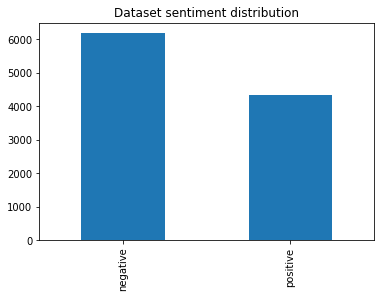

In [ ]:
predictions.dropna(how='any', inplace=True)
# Some sentiment are 'na' which we must drop first
predictions = predictions[predictions.sentiment!= 'na']
predictions.sentiment.value_counts().plot.bar(title='Dataset sentiment distribution')

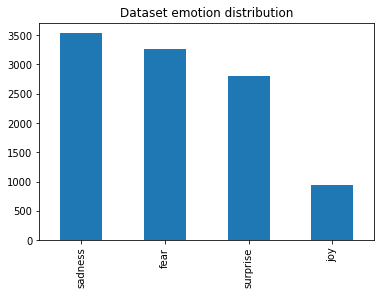

In [ ]:
predictions.dropna(how='any', inplace=True)
predictions = predictions[predictions.emotion!= 'na']
predictions.emotion.value_counts().plot.bar(title='Dataset emotion distribution')

In [ ]:
import numpy as np
#matrix for bert embedding
mat = np.matrix([x for x in predictions.bert_embeddings])

In [ ]:
mat.shape

(10544, 128)

In [ ]:
print(mat)

[[-1.35354888  1.2997396  -0.61023164 ... -1.74658418 -1.32929313
   2.89533424]
 [-1.13452816  0.8951003  -0.90850669 ... -2.15404034 -1.34288371
   1.48193097]
 [-1.65828407  0.751957   -1.14488637 ... -1.85755026 -1.09548819
   0.94623828]
 ...
 [-1.72874451  0.38773277 -0.44077384 ... -1.82034636 -0.69188792
   0.74182934]
 [-1.32274997  0.90223444 -0.71750385 ... -1.21412206 -1.00355339
   0.82617313]
 [-1.94246638 -0.10625926 -0.31048506 ... -1.27740073 -1.01771379
   0.06159321]]


In [ ]:
# reducing the dimesion from 128 --> 2 
from sklearn.manifold import TSNE
model = TSNE(n_components=2)
low_dim_data = model.fit_transform(mat)
print('Lower dim data has shape',low_dim_data.shape)

Lower dim data has shape (10544, 2)


In [ ]:
# set some styles for for Plotting
import seaborn as sns
# Style Plots a bit
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1,rc={"lines.linewidth": 2.5})

%matplotlib inline
import matplotlib as plt
plt.rcParams['figure.figsize'] = (20, 14)
from matplotlib import pyplot as plt


**Plot low dimensional for POS**

In [ ]:
tsne_df =  pd.DataFrame(low_dim_data, predictions.pos)
tsne_df.columns = ['x','y']
tsne_df.head(10)

,x,y
pos,,
NNP,60.106503,-15.788042
CC,60.060482,-15.723911
NNP,69.440445,-6.573375
PRP,-70.547905,13.100520
VBP,-46.444954,26.651152
VB,-38.890560,63.586643
NN,-22.298239,9.965051
NNS,-23.830700,9.838296
VBP,-34.868160,27.354460


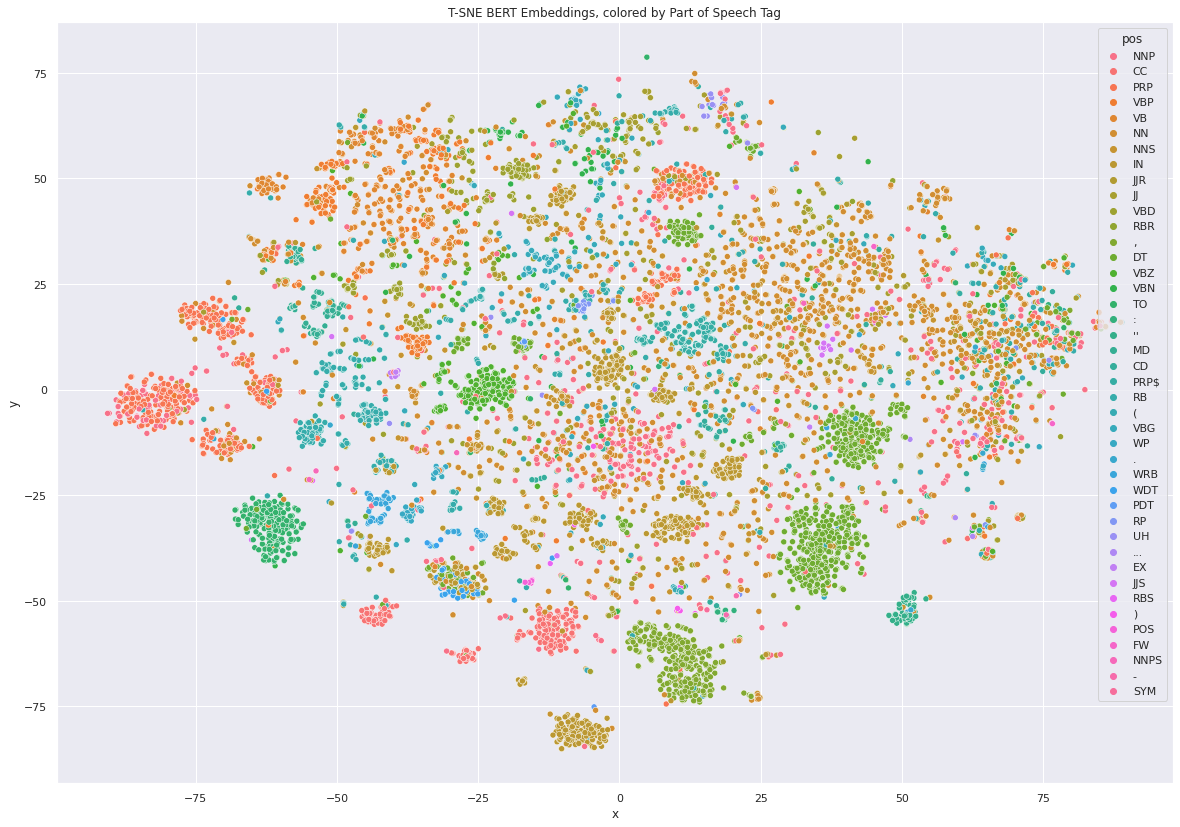

In [ ]:
ax = sns.scatterplot(data=tsne_df, x='x', y='y', hue=tsne_df.index)
ax.set_title('T-SNE BERT Embeddings, colored by Part of Speech Tag')
plt.savefig('pos.png')

**Plot Low dimensional Sarcasm**

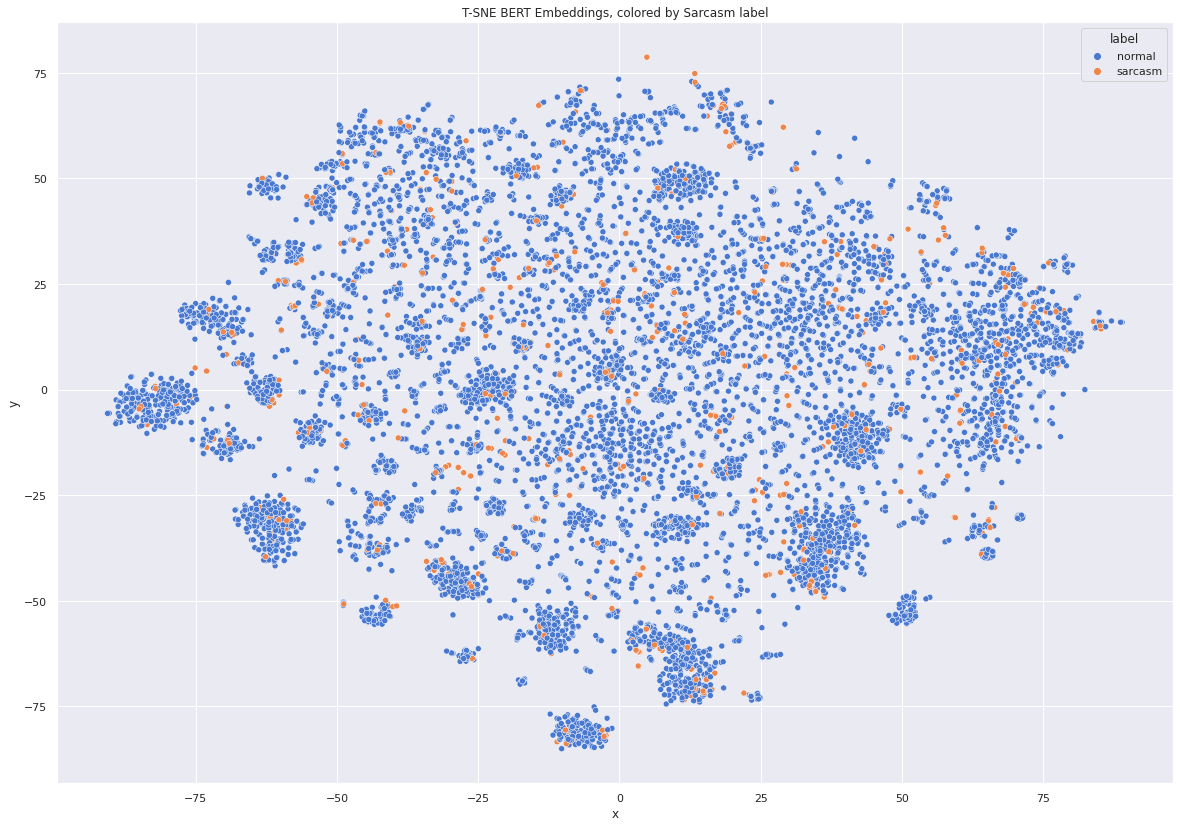

In [ ]:
tsne_df =  pd.DataFrame(low_dim_data, predictions.label.replace({1:'sarcasm',0:'normal'}))
tsne_df.columns = ['x','y']
ax = sns.scatterplot(data=tsne_df, x='x', y='y', hue=tsne_df.index)
ax.set_title('T-SNE BERT Embeddings, colored by Sarcasm label')

plt.savefig('sarcasm.png')

**Plot Low Dimesional Sentiment**

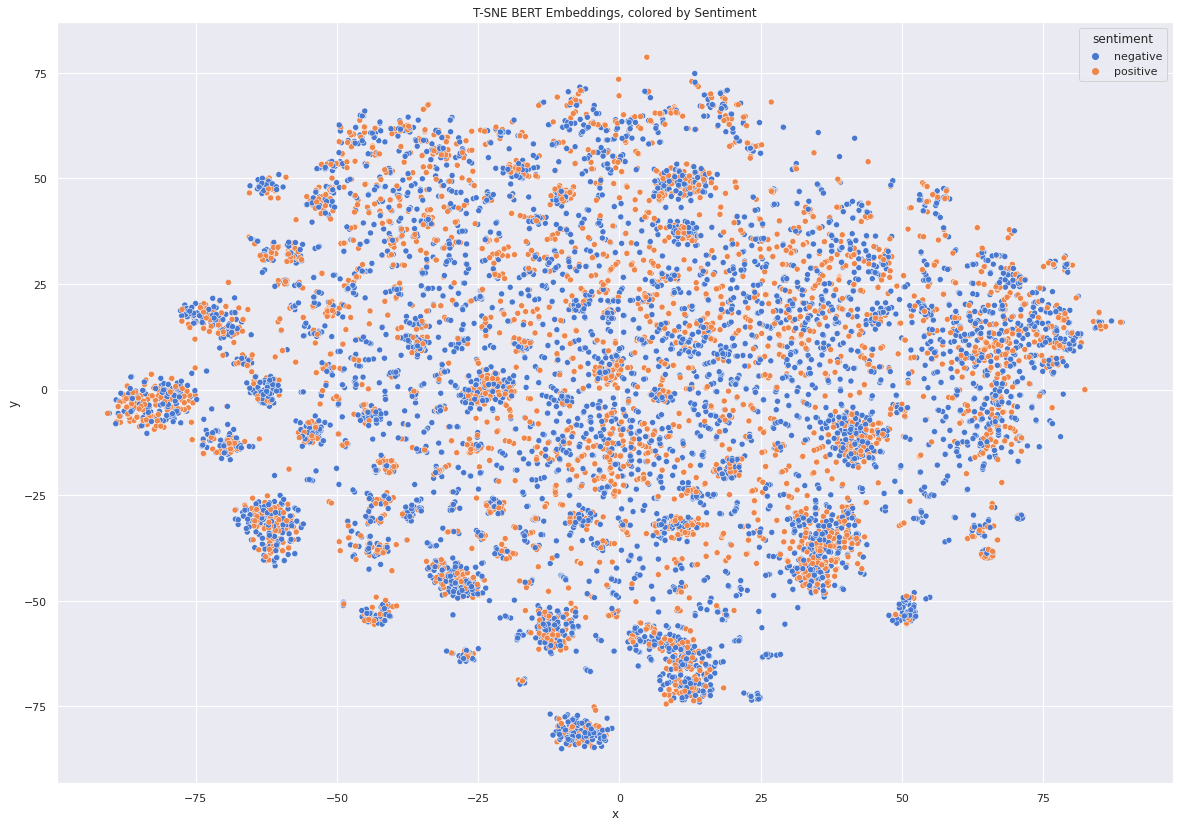

In [ ]:
tsne_df =  pd.DataFrame(low_dim_data, predictions.sentiment)
tsne_df.columns = ['x','y']
ax = sns.scatterplot(data=tsne_df, x='x', y='y', hue=tsne_df.index)
ax.set_title('T-SNE BERT Embeddings, colored by Sentiment')
plt.savefig('sentiment.png')


**Plot low dimensional for Emotion**

Text(0.5, 1.0, 'T-SNE BERT Embeddings, colored by Emotion')

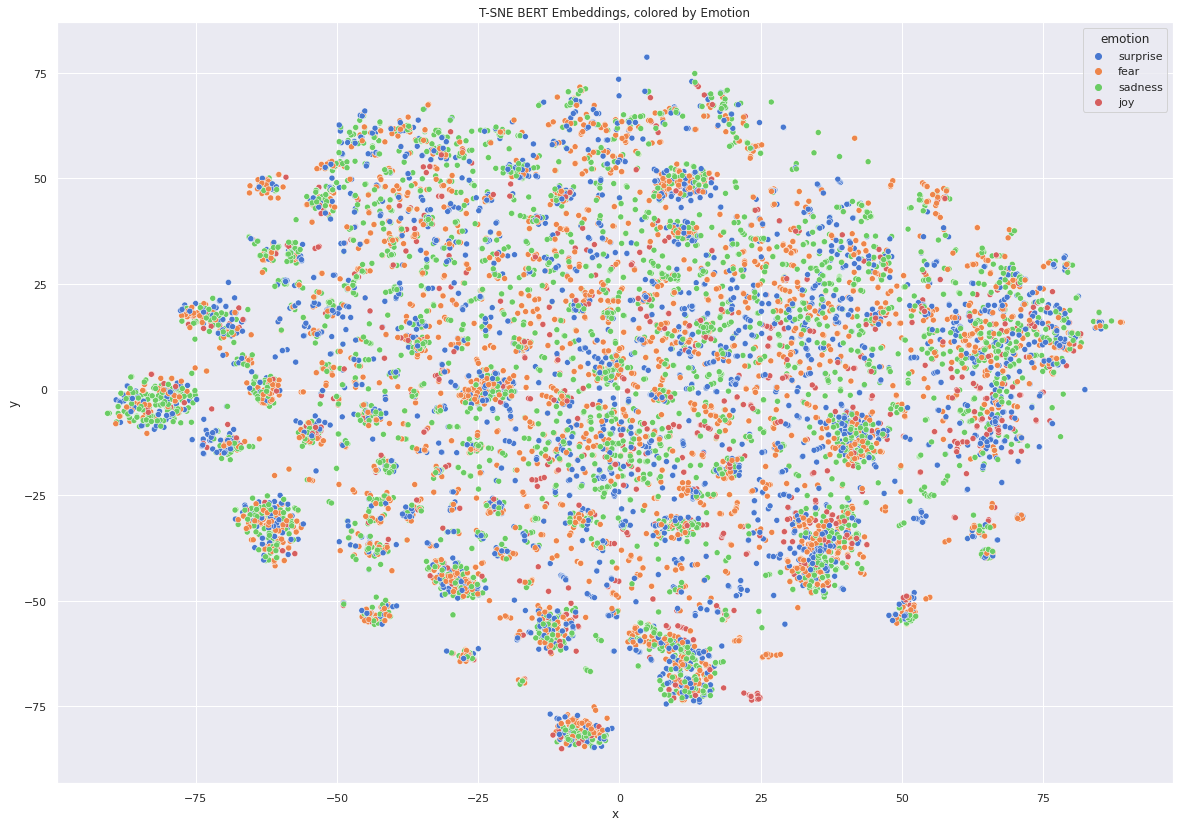

In [ ]:
tsne_df =  pd.DataFrame(low_dim_data, predictions.emotion)
tsne_df.columns = ['x','y']
ax = sns.scatterplot(data=tsne_df, x='x', y='y', hue=tsne_df.index)
ax.set_title('T-SNE BERT Embeddings, colored by Emotion')